# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [69]:
import pandas as pd
df = pd.read_csv('~/APMAE4990-/data/hw2data.csv')
df.head(20)

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114,-2.663126
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226,10.399650
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970,-21.762801
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167,2.139453
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599,0.194017
5,1.593274,0.568722,-0.114487,0.251630,-1.210856,-0.393734,0.085253,0.099422,-1.530616,0.327623,...,1.363743,0.374138,1.310265,-0.267748,0.213176,-1.203243,1.178031,0.108648,0.044129,9.640786
6,0.338316,1.446792,-0.214495,1.663039,-0.851523,0.422185,2.009219,-0.489815,0.245256,0.877505,...,0.576479,0.065306,-0.773513,0.394948,-0.503890,1.779559,-0.030572,1.577088,-0.812802,4.490042
7,0.613349,1.843700,0.271091,1.136448,-1.738332,0.707135,0.030386,0.765002,0.867665,-2.256250,...,-0.034404,0.519269,-0.672583,1.173611,-1.592229,-0.013649,-0.098345,0.849877,-0.494986,-0.657482
8,1.068731,-0.233866,-0.101805,-0.149077,0.698096,0.853148,-0.604741,-1.408891,-0.981102,0.165183,...,0.424889,-0.271260,-0.683568,-1.537438,-0.101374,0.746666,0.929182,0.229418,0.414406,0.073541
9,0.309724,-0.737456,-1.536920,-0.562255,-1.599511,0.824390,2.491486,1.011855,-0.281238,0.016707,...,1.260308,0.332623,2.495995,0.334872,0.244085,-1.081475,-1.671211,1.029452,-0.395552,-13.133014


b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [70]:
y = df['y']
x = df.drop(['y'],1)

In [71]:
x.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,...,0.441033,0.178793,-0.799422,0.240788,0.289121,0.412871,-0.198399,0.094192,-1.147611,-0.358114
1,0.555963,0.892474,-0.422315,0.104714,0.228053,0.201480,0.540774,-1.818078,-0.049324,0.239034,...,-0.998849,-0.740137,-0.565498,0.476031,-2.158069,1.318551,-0.239297,-0.246794,-1.079343,-0.114226
2,0.013240,-0.121945,0.339059,-0.589632,-0.895816,0.548328,0.098667,0.197181,1.059027,-1.022564,...,1.342622,-0.739936,1.315138,-0.323457,0.197828,0.097751,1.401523,0.158434,-1.141901,-1.310970
3,-1.532921,-1.711970,0.046135,-0.958374,-0.080812,-0.703859,-0.770784,-0.480845,0.703586,0.929145,...,0.140811,0.473488,1.855246,1.415656,-0.302746,0.989679,0.585851,1.136388,0.671617,-0.974167
4,-1.619685,0.572627,1.902618,-0.775664,-0.188090,-1.035748,1.177830,-2.305167,-2.263660,0.375020,...,-0.340560,-1.303220,0.466751,0.161106,0.320032,2.079177,-0.907466,-0.192404,-1.212516,-0.080599


c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

/Users/verayujiefeng/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


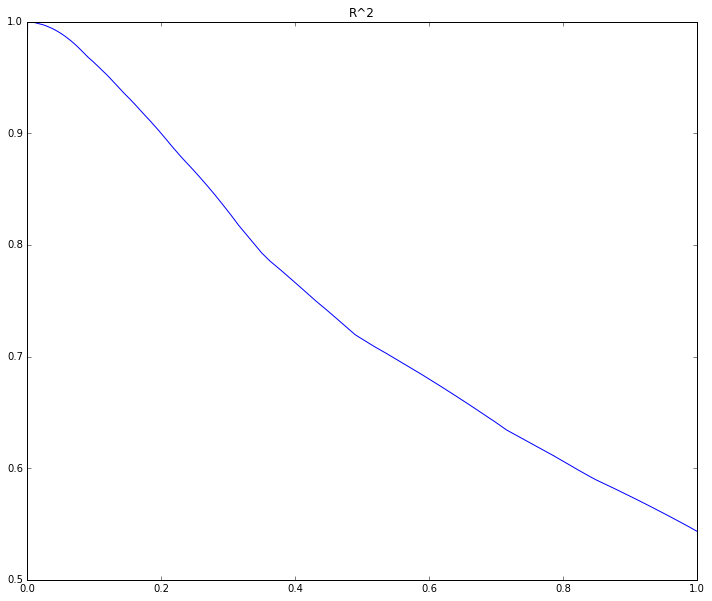

In [72]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

size = len(y)

#split the data into training and testing sets
x_train = x[0:int(size*0.8)]
x_test = x[int(size*0.8):]

#split the targets into training and testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

#create linear regression object
alphas = np.logspace(-5, 0, 1000)
from sklearn.linear_model import Lasso
scores = []

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    
    #Train the model using the training sets
    regr.fit(x_train, y_train)
    #y_pred = regr.predict(x_train)
    scores.append(regr.score(x_test, y_test))
    #plt.scatter(regr.predict(X_test),y_test)
plt.plot(alphas,scores)
#plt.figure(figsize=(10,10))
plt.title('R^2')
#plt.scatter(regr.predict(x_test),y_test)
#plt.plot(y_test,y_test)

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

$$ \frac{1}{N} \sum_{k=1}^N (y_i - \beta \cdot x_i)^2 + \alpha \|\beta\|_{L^1}$$

$$ \|\beta\|_{L^1} = |\beta_1| + |\beta_2| + \cdots |\beta_m| $$ 

Where here $m$ = 500

/Users/verayujiefeng/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


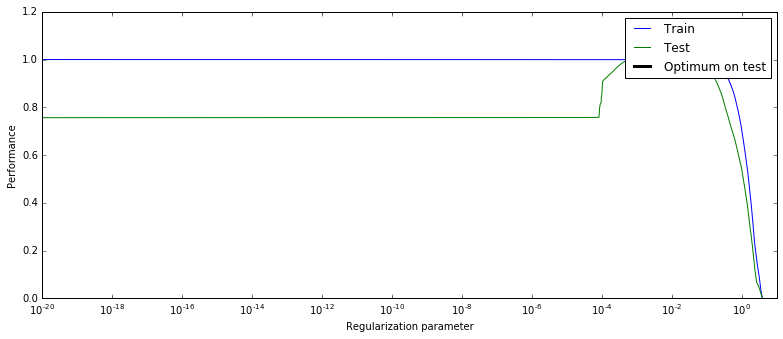

In [73]:

import matplotlib.pyplot as plt
import numpy as np
plt.subplot(2, 1, 1)
size = len(y)

#split the data into training and testing sets
x_train = x[0:int(size*0.8)]
x_test = x[int(size*0.8):]

#split the targets into training and testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]
# Fill these in
alphas = np.logspace(-20, 0.8, 2000)
train_errors= []
test_errors= []
from sklearn.linear_model import Lasso

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    # Training model on training data for fixed alpha
    regr.fit(x_train, y_train)
    # Computes performance on training data
    train_error = regr.score(x_train,y_train)
    # Appends it to the array train_errors
    train_errors.append(train_error)
    # computing R^2 on testing data
    test_error = regr.score(x_test,y_test)
    # appends it to the test_errors array
    test_errors.append(test_error)
   
alpha_optim=0

plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

# Show estimated coef_ vs true coef

plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()


e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

/Users/verayujiefeng/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/Users/verayujiefeng/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)


(array([ 499.]),
 array([-3.43030335,  2.68495551]),
 <a list of 1 Patch objects>)

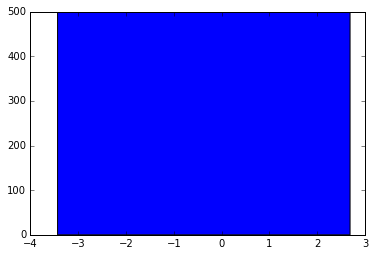

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.linear_model import Lasso

regr = Lasso(alpha=0)
regr.fit(x_train, y_train)
coefs= regr.coef_
top_coefs = np.delete(coefs, "0")
plt.hist(top_coefs, bins=1)


In [75]:
coefs

array([ 0.,  0.,  0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0., -0., -0., -0.,  0.,  0., -0.,  0., -0.,
        0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
        0., -0., -0., -0.,  0., -0., -0., -0.,  0., -0.,  0.,  0., -0.,
        0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,
        0.,  0.,  0., -0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,
       -0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,
       -0., -0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,
       -0., -0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0., -0., -0., -0., -0., -0.,  0., -0.,  0., -0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0., -0., -0.,  0., -0., -0., -0., -0

There are a lot of zeros because Lasso quickly drops out a lot of irrelevant variables. There are only four positions for variables to be relevant in L1 - the four corners.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

[ 0.7773837   0.81429647  0.84440743  0.85208258  0.75671921]


/Users/verayujiefeng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:1531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/verayujiefeng/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/verayujiefeng/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:1531: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/verayujiefeng/anaconda/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:454: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/Users/verayujiefeng/anaconda/lib/python3.5/site-pac

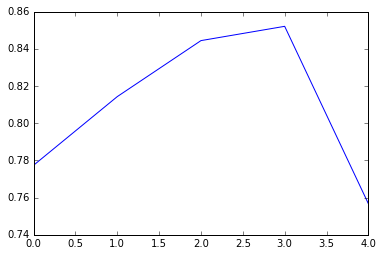

In [87]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0)
scores = cross_val_score(lasso, x, y, cv=5)
print(scores)
plt.plot(scores)

No, the model doesn't work well on all random subsets. For example, R^2 is relatively low for the fourth subset.

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [ ]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        x_train, x_test = x[train_index], x[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(x_train,y_train)
        y_pred[test_index] = clf.predict(x_test)
        coeffs.append(clf.coef_)
    return coeffs

alpha_best = 0

scaler = preprocessing.StandardScaler()
x_scaled = x.as_matrix().astype(np.float)
x_scaled = scaler.fit_transform(x)

coeffs=run_cv_coeffs(x_scaled,np.array(y),Lasso,alpha=alpha_best)

In [ ]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

In [ ]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))